# Machine Learning

### K Means Clustering Algorithm

What does it do?
If we are give random datapoints and we have to categorize them

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('013.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


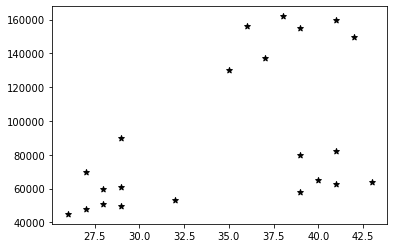

In [3]:
plt.scatter(df['Age'], df['Income($)'], color='black', marker='*')

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop(['Name'], axis='columns'))

In [5]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


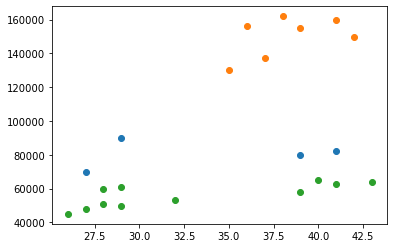

In [6]:
plt.scatter(df[df.cluster==0]['Age'], df[df.cluster==0]['Income($)'])
plt.scatter(df[df.cluster==1]['Age'], df[df.cluster==1]['Income($)'])
plt.scatter(df[df.cluster==2]['Age'], df[df.cluster==2]['Income($)'])

##### The above clustering is bad because X-axis Scale is very different from Y-axis Scale

In [7]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.drop(['Name','cluster'], axis='columns'))
df['cluster'] = y_predicted

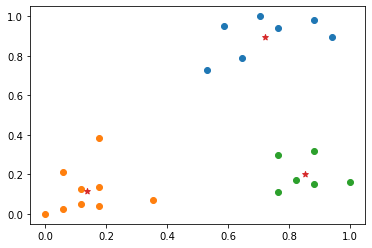

In [9]:
plt.scatter(df[df.cluster==0]['Age'], df[df.cluster==0]['Income($)'])
plt.scatter(df[df.cluster==1]['Age'], df[df.cluster==1]['Income($)'])
plt.scatter(df[df.cluster==2]['Age'], df[df.cluster==2]['Income($)'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*')

In [10]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


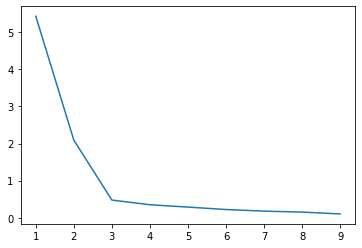

In [12]:
plt.plot(k_range, sse)